### Pandas 10분 완성

In [24]:
#일반적으로 각 패키지는 pd, np, plt라는 이름으로 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Object Creation(객체 생성)
#Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
#datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

dates = pd.date_range('20130101', periods = 6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,0.181472,-1.119955,-1.162473,0.391416
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-03,-1.180061,0.157494,0.828884,-0.209682
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918
2013-01-06,0.092494,-0.296941,-0.382957,1.162712


In [8]:
#Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
                    'D' : np.array([3]*4, dtype = 'int32'),
                    'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
#데이터프레임 결과물의 열은 다양한 데이터 타입(dtypes)으로 구성됩니다.

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [15]:
#Viewing Data(데이터 확인하기)
#데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다.

print(df.tail(3))
print(df.tail())
df.head()

                   A         B         C         D
2013-01-04 -0.271915 -0.412714 -0.751353 -0.233886
2013-01-05 -1.714998  0.293327 -0.552588 -0.228918
2013-01-06  0.092494 -0.296941 -0.382957  1.162712
                   A         B         C         D
2013-01-02  0.705394 -0.530057 -0.336758 -1.617216
2013-01-03 -1.180061  0.157494  0.828884 -0.209682
2013-01-04 -0.271915 -0.412714 -0.751353 -0.233886
2013-01-05 -1.714998  0.293327 -0.552588 -0.228918
2013-01-06  0.092494 -0.296941 -0.382957  1.162712


,A,B,C,D
2013-01-01,0.181472,-1.119955,-1.162473,0.391416
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-03,-1.180061,0.157494,0.828884,-0.209682
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918


In [19]:
#인덱스(index), 열(column), 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 0.18147171, -1.11995479, -1.16247326,  0.39141649],
       [ 0.70539442, -0.53005659, -0.33675839, -1.61721646],
       [-1.18006089,  0.15749442,  0.8288843 , -0.20968164],
       [-0.27191529, -0.41271359, -0.75135332, -0.23388649],
       [-1.71499835,  0.29332665, -0.55258833, -0.22891768],
       [ 0.09249417, -0.29694069, -0.3829572 ,  1.16271243]])

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.364602,-0.318141,-0.392874,-0.122596
std,0.910951,0.509378,0.669663,0.914482
min,-1.714998,-1.119955,-1.162473,-1.617216
25%,-0.953024,-0.500721,-0.701662,-0.232644
50%,-0.089711,-0.354827,-0.467773,-0.219300
75%,0.159227,0.043886,-0.348308,0.241142
max,0.705394,0.293327,0.828884,1.162712


In [23]:
#행과 열 전치
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.181472,0.705394,-1.180061,-0.271915,-1.714998,0.092494
B,-1.119955,-0.530057,0.157494,-0.412714,0.293327,-0.296941
C,-1.162473,-0.336758,0.828884,-0.751353,-0.552588,-0.382957
D,0.391416,-1.617216,-0.209682,-0.233886,-0.228918,1.162712


In [24]:
#축 별로 정렬합니다.

df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.391416,-1.162473,-1.119955,0.181472
2013-01-02,-1.617216,-0.336758,-0.530057,0.705394
2013-01-03,-0.209682,0.828884,0.157494,-1.180061
2013-01-04,-0.233886,-0.751353,-0.412714,-0.271915
2013-01-05,-0.228918,-0.552588,0.293327,-1.714998
2013-01-06,1.162712,-0.382957,-0.296941,0.092494


In [25]:
#값 별로 정렬합니다.

df.sort_values(by = 'B')

,A,B,C,D
2013-01-01,0.181472,-1.119955,-1.162473,0.391416
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886
2013-01-06,0.092494,-0.296941,-0.382957,1.162712
2013-01-03,-1.180061,0.157494,0.828884,-0.209682
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918


In [26]:
#Getting (데이터 얻기)
#df.A와 동일한 Series를 생성하는 단일 열을 선택합니다.

df['A']

2013-01-01    0.181472
2013-01-02    0.705394
2013-01-03   -1.180061
2013-01-04   -0.271915
2013-01-05   -1.714998
2013-01-06    0.092494
Freq: D, Name: A, dtype: float64

In [27]:
#행을 분할하는 []를 통해 선택합니다.

df[0:3]

,A,B,C,D
2013-01-01,0.181472,-1.119955,-1.162473,0.391416
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-03,-1.180061,0.157494,0.828884,-0.209682


In [28]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-03,-1.180061,0.157494,0.828884,-0.209682
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886


In [30]:
#Selection by Label

df.loc[dates[0]]

A    0.181472
B   -1.119955
C   -1.162473
D    0.391416
Name: 2013-01-01 00:00:00, dtype: float64

In [37]:
#라벨을 사용하여 여러 축을 얻습니다.

df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.181472,-1.119955
2013-01-02,0.705394,-0.530057
2013-01-03,-1.180061,0.157494
2013-01-04,-0.271915,-0.412714
2013-01-05,-1.714998,0.293327
2013-01-06,0.092494,-0.296941


In [38]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.705394,-0.530057
2013-01-03,-1.180061,0.157494
2013-01-04,-0.271915,-0.412714


In [39]:
#반환되는 객체의 차원을 줄입니다.

df.loc['20130102', ['A', 'B']]

A    0.705394
B   -0.530057
Name: 2013-01-02 00:00:00, dtype: float64

In [41]:
#스칼라 값을 얻습니다.

df.loc[dates[0], 'A']

0.1814717082041012

In [42]:
#스칼라 값을 더 빠르게 구하는 방법입니다.

df.at[dates[0], 'A']

0.1814717082041012

In [43]:
#Selection by Position(위치로 선택하기) -->index번호로 지정 가능!

df.iloc[3]

A   -0.271915
B   -0.412714
C   -0.751353
D   -0.233886
Name: 2013-01-04 00:00:00, dtype: float64

In [44]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.271915,-0.412714
2013-01-05,-1.714998,0.293327


In [45]:
#정수로 표기된 위치값의 리스트들을 통해, numpy/python의 스타일과 유사해집니다.

df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.705394,-0.336758
2013-01-03,-1.180061,0.828884
2013-01-05,-1.714998,-0.552588


In [46]:
#명시적으로 행을 나누고자 하는 경우입니다.

df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-03,-1.180061,0.157494,0.828884,-0.209682


In [47]:
#명시적으로 열을 나누고자 하는 경우입니다.

df.iloc[:, 1:3]

,B,C
2013-01-01,-1.119955,-1.162473
2013-01-02,-0.530057,-0.336758
2013-01-03,0.157494,0.828884
2013-01-04,-0.412714,-0.751353
2013-01-05,0.293327,-0.552588
2013-01-06,-0.296941,-0.382957


In [48]:
#명시적으로 특정한 값을 얻고자 하는 경우입니다.

df.iloc[1,1]

-0.5300565940640165

In [49]:
#스칼라를 빠르게 얻는 방법입니다. 

df.iat[1,1]

-0.5300565940640165

In [50]:
#Boolean Indexing
#데이터를 선택하기 위해 단일 열의 값을 사용합니다.

df[df.A > 0]

,A,B,C,D
2013-01-01,0.181472,-1.119955,-1.162473,0.391416
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216
2013-01-06,0.092494,-0.296941,-0.382957,1.162712


In [51]:
#Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.

df[df > 0]

,A,B,C,D
2013-01-01,0.181472,NaN,NaN,0.391416
2013-01-02,0.705394,NaN,NaN,NaN
2013-01-03,NaN,0.157494,0.828884,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.293327,NaN,NaN
2013-01-06,0.092494,NaN,NaN,1.162712


In [53]:
#필터링을 위한 메소드 isin()을 사용합니다.

df2 = df.copy()

In [55]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.181472,-1.119955,-1.162473,0.391416,one
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216,one
2013-01-03,-1.180061,0.157494,0.828884,-0.209682,two
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886,three
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918,four
2013-01-06,0.092494,-0.296941,-0.382957,1.162712,three


In [58]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.180061,0.157494,0.828884,-0.209682,two
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918,four


In [61]:
#새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.

s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [63]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.181472,-1.119955,-1.162473,0.391416,NaN
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216,1.0
2013-01-03,-1.180061,0.157494,0.828884,-0.209682,2.0
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886,3.0
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918,4.0
2013-01-06,0.092494,-0.296941,-0.382957,1.162712,5.0


In [68]:
df.at[dates[0], 'A'] = 0
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.162473,0.391416,NaN
2013-01-02,0.705394,-0.530057,-0.336758,-1.617216,1.0
2013-01-03,-1.180061,0.157494,0.828884,-0.209682,2.0
2013-01-04,-0.271915,-0.412714,-0.751353,-0.233886,3.0
2013-01-05,-1.714998,0.293327,-0.552588,-0.228918,4.0
2013-01-06,0.092494,-0.296941,-0.382957,1.162712,5.0


In [70]:
#Numpy 배열을 사용한 할당에 의해 값을 설정합니다.

df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.162473,5,NaN
2013-01-02,0.705394,-0.530057,-0.336758,5,1.0
2013-01-03,-1.180061,0.157494,0.828884,5,2.0
2013-01-04,-0.271915,-0.412714,-0.751353,5,3.0
2013-01-05,-1.714998,0.293327,-0.552588,5,4.0
2013-01-06,0.092494,-0.296941,-0.382957,5,5.0


In [71]:
#where 연산을 설정합니다.

df2 = df.copy()

In [73]:
df2[df2 > 0] = -df2
df2

#0보다 큰 모든 수 앞에 -를 붙입니다.

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.162473,-5,NaN
2013-01-02,-0.705394,-0.530057,-0.336758,-5,-1.0
2013-01-03,-1.180061,-0.157494,-0.828884,-5,-2.0
2013-01-04,-0.271915,-0.412714,-0.751353,-5,-3.0
2013-01-05,-1.714998,-0.293327,-0.552588,-5,-4.0
2013-01-06,-0.092494,-0.296941,-0.382957,-5,-5.0


In [76]:
#Missing Data(결측치)
#Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 
#Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있습니다. 

df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.162473,5,NaN,1.0
2013-01-02,0.705394,-0.530057,-0.336758,5,1.0,1.0
2013-01-03,-1.180061,0.157494,0.828884,5,2.0,NaN
2013-01-04,-0.271915,-0.412714,-0.751353,5,3.0,NaN


In [78]:
#결측치를 가지고 있는 행들을 지웁니다.

df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,0.705394,-0.530057,-0.336758,5,1.0,1.0


In [79]:
#결측치를 채워 넣습니다.

df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.162473,5,5.0,1.0
2013-01-02,0.705394,-0.530057,-0.336758,5,1.0,1.0
2013-01-03,-1.180061,0.157494,0.828884,5,2.0,5.0
2013-01-04,-0.271915,-0.412714,-0.751353,5,3.0,5.0


In [80]:
#nan인 값에 boolean을 통한 표식을 얻습니다.
#데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.

pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [81]:
#Operation(연산)
#Stats(통계) : 일반적으로 결측치를 제외한 후 연산됩니다.

df.mean()
#column을 기준으로

A   -0.394848
B   -0.131482
C   -0.392874
D    5.000000
F    3.000000
dtype: float64

In [84]:
#다른 축을 기준으로 동일한 연산 수행합니다.

df.mean(1)

2013-01-01    0.959382
2013-01-02    1.167716
2013-01-03    1.361264
2013-01-04    1.312804
2013-01-05    1.405148
2013-01-06    1.882519
Freq: D, dtype: float64

In [86]:
s = pd.Series([1,3,5,np.nan,6,8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [87]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.180061,-0.842506,-0.171116,4.0,1.0
2013-01-04,-3.271915,-3.412714,-3.751353,2.0,0.0
2013-01-05,-6.714998,-4.706673,-5.552588,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [88]:
#Apply(적용)
#누적합계 함수를 사용합니다.
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.162473,5,NaN
2013-01-02,0.705394,-0.530057,-1.499232,10,1.0
2013-01-03,-0.474666,-0.372562,-0.670347,15,3.0
2013-01-04,-0.746582,-0.785276,-1.421701,20,6.0
2013-01-05,-2.461580,-0.491949,-1.974289,25,10.0
2013-01-06,-2.369086,-0.788890,-2.357246,30,15.0


In [89]:
df.apply(lambda x: x.max() - x.min())

A    2.420393
B    0.823383
C    1.991358
D    0.000000
F    4.000000
dtype: float64

In [91]:
#Histogramming(히스토그래밍)
#0부터 6까지 랜덤으로 숫자를 집어넣습니다.

s = pd.Series(np.random.randint(0, 7, size = 10))
s

0    4
1    2
2    0
3    3
4    0
5    2
6    0
7    1
8    0
9    6
dtype: int64

In [92]:
#value값을 세어줍니다.

s.value_counts()

0    4
2    2
6    1
4    1
3    1
1    1
dtype: int64

In [94]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [95]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [97]:
#Merge(병합)
#Concat(연결): 결합(join)/병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능

df = pd.DataFrame(np.random.randn(10,4))
df


,0,1,2,3
0,0.785461,-0.538388,-0.928401,0.019111
1,0.207800,-1.249481,0.756756,1.436950
2,-1.312448,0.525758,0.748225,-0.721974
3,-1.563548,0.317817,-1.361479,0.283124
4,0.177976,-0.981101,-0.176063,-0.368535
5,-0.529064,-2.065653,0.364946,-0.344895
6,0.755990,0.147050,0.625515,0.119010
7,-1.004391,-0.938631,-0.361599,-0.233748
8,-2.101965,-0.322106,-0.507298,0.652508
9,-0.199797,0.568357,0.957735,1.307854


In [99]:
#break it into pieces

pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.785461 -0.538388 -0.928401  0.019111
 1  0.207800 -1.249481  0.756756  1.436950
 2 -1.312448  0.525758  0.748225 -0.721974,
           0         1         2         3
 3 -1.563548  0.317817 -1.361479  0.283124
 4  0.177976 -0.981101 -0.176063 -0.368535
 5 -0.529064 -2.065653  0.364946 -0.344895
 6  0.755990  0.147050  0.625515  0.119010,
           0         1         2         3
 7 -1.004391 -0.938631 -0.361599 -0.233748
 8 -2.101965 -0.322106 -0.507298  0.652508
 9 -0.199797  0.568357  0.957735  1.307854]

In [101]:
#slice들을 다시 합칩니다.

pd.concat(pieces)

,0,1,2,3
0,0.785461,-0.538388,-0.928401,0.019111
1,0.207800,-1.249481,0.756756,1.436950
2,-1.312448,0.525758,0.748225,-0.721974
3,-1.563548,0.317817,-1.361479,0.283124
4,0.177976,-0.981101,-0.176063,-0.368535
5,-0.529064,-2.065653,0.364946,-0.344895
6,0.755990,0.147050,0.625515,0.119010
7,-1.004391,-0.938631,-0.361599,-0.233748
8,-2.101965,-0.322106,-0.507298,0.652508
9,-0.199797,0.568357,0.957735,1.307854


In [107]:
#Join(결합)

left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [108]:
right

,key,rval
0,foo,4
1,foo,5


In [109]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [112]:
#다른 예시입니다.

left = pd.DataFrame({'key':['foo', 'bar'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo', 'bar'], 'rval':[4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [113]:
right

,key,rval
0,foo,4
1,bar,5


In [114]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [117]:
#Append(추가)
#데이터프레임에 행을 추가합니다.

df = pd.DataFrame(np.random.randn(8,4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.020122,0.759069,-1.062474,0.163387
1,-0.675944,-0.764669,0.658061,0.869742
2,-0.170194,-0.365775,-0.515378,-0.664095
3,-1.415898,2.311295,0.711355,-1.747430
4,1.593441,1.358417,-0.271187,0.217352
5,-0.495221,1.022269,1.361231,0.214851
6,-0.903603,-1.971637,1.318917,2.334011
7,1.480996,0.908563,0.755007,-0.637461


In [119]:
s = df.iloc[3]
#index가 3인 행(위치X)

A   -1.415898
B    2.311295
C    0.711355
D   -1.747430
Name: 3, dtype: float64

In [120]:
df.append(s, ignore_index = True)

#데이터프레임 마지막 행으로 들어왔습니다.

,A,B,C,D
0,-0.020122,0.759069,-1.062474,0.163387
1,-0.675944,-0.764669,0.658061,0.869742
2,-0.170194,-0.365775,-0.515378,-0.664095
3,-1.415898,2.311295,0.711355,-1.747430
4,1.593441,1.358417,-0.271187,0.217352
5,-0.495221,1.022269,1.361231,0.214851
6,-0.903603,-1.971637,1.318917,2.334011
7,1.480996,0.908563,0.755007,-0.637461
8,-1.415898,2.311295,0.711355,-1.747430


In [121]:
#Grouping(그룹화):그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.
 #몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
 #각 그룹에 독립적으로 함수를 적용(applying)
 #결과물들을 하나의 데이터 구조로 결합(combining)

df = pd.DataFrame(
     {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
 
     })
df

,A,B,C,D
0,foo,one,0.080091,-1.028155
1,bar,one,-0.753567,0.076463
2,foo,two,1.493729,-0.857336
3,bar,three,0.506468,1.184262
4,foo,two,-0.187171,-0.724730
5,bar,two,-0.690740,-0.602386
6,foo,one,-0.817825,0.584401
7,foo,three,0.321978,0.126169


In [122]:
#생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.

df.groupby('A').sum()

,C,D
A,,
bar,-0.937838,0.658339
foo,0.890803,-1.899650


In [123]:
#여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 

df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.753567  0.076463
    three  0.506468  1.184262
    two   -0.690740 -0.602386
foo one   -0.737734 -0.443754
    three  0.321978  0.126169
    two    1.306558 -1.582066

In [125]:
#Reshaping(변형)
#Stack(스택)

tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [127]:
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [130]:
df = pd.DataFrame(np.random.randn(8,2), index = index, columns = ['A', 'B'])
df

A         B
first second                    
bar   one     1.197390  0.045212
      two    -0.437126 -1.323344
baz   one     1.342452  0.689085
      two     0.107028 -1.368808
foo   one    -1.010190  0.472087
      two     2.036355 -2.091075
qux   one     0.548997  0.424956
      two    -0.865336  0.111929

In [132]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.197390  0.045212
      two    -0.437126 -1.323344
baz   one     1.342452  0.689085
      two     0.107028 -1.368808

In [133]:
#stack() 메소드는 데이터프레임 열들의 계층을 '압축'합니다.

stacked = df2.stack()
stacked

first  second   
bar    one     A    1.197390
               B    0.045212
       two     A   -0.437126
               B   -1.323344
baz    one     A    1.342452
               B    0.689085
       two     A    0.107028
               B   -1.368808
dtype: float64

In [134]:
#'Stack된' 데이터프레임 또는 Series인 경우, stack()의 역 연산을 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.

stacked.unstack()

A         B
first second                    
bar   one     1.197390  0.045212
      two    -0.437126 -1.323344
baz   one     1.342452  0.689085
      two     0.107028 -1.368808

In [136]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.197390 -0.437126
      B  0.045212 -1.323344
baz   A  1.342452  0.107028
      B  0.689085 -1.368808

In [137]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.197390  1.342452
       B  0.045212  0.689085
two    A -0.437126  0.107028
       B -1.323344 -1.368808

In [139]:
#Pivot Tables(피봇 테이블)

df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.904395,0.731359
1,one,B,foo,0.688284,-1.202996
2,two,C,foo,-1.144513,-2.054536
3,three,A,bar,-0.629252,-1.244374
4,one,B,bar,-1.327955,-0.667817
5,one,C,bar,0.558018,-0.237995
6,two,A,foo,-0.967748,0.622197
7,three,B,foo,0.236914,0.485704
8,one,C,foo,-0.526578,-0.737417
9,one,A,bar,0.279802,-0.677217


In [140]:
#이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.

pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A  0.279802 -0.904395
      B -1.327955  0.688284
      C  0.558018 -0.526578
three A -0.629252       NaN
      B       NaN  0.236914
      C  0.703517       NaN
two   A       NaN -0.967748
      B  0.191377       NaN
      C       NaN -1.144513

In [12]:
#Time Series(시계열)
#Pandas는 자주 일어나는 변환 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다.

rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')
ts = pd.Series(np.random.randint(0,500,len(rng)), index = rng)
ts

2012-01-01 00:00:00    449
2012-01-01 00:00:01    435
2012-01-01 00:00:02    279
2012-01-01 00:00:03    243
2012-01-01 00:00:04    341
                      ... 
2012-01-01 00:01:35    242
2012-01-01 00:01:36    129
2012-01-01 00:01:37    285
2012-01-01 00:01:38    379
2012-01-01 00:01:39    132
Freq: S, Length: 100, dtype: int64

In [13]:
ts.resample('5Min').sum()

2012-01-01    25710
Freq: 5T, dtype: int64

In [16]:
#시간대를 표현합니다.

rng = pd.date_range('3/6/2012 00:00', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-06   -0.287890
2012-03-07    0.649531
2012-03-08   -0.484149
2012-03-09   -0.765722
2012-03-10   -0.225905
Freq: D, dtype: float64

In [17]:
#지역화

ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.287890
2012-03-07 00:00:00+00:00    0.649531
2012-03-08 00:00:00+00:00   -0.484149
2012-03-09 00:00:00+00:00   -0.765722
2012-03-10 00:00:00+00:00   -0.225905
Freq: D, dtype: float64

In [18]:
#다른 시간대로 변환합니다.

ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.287890
2012-03-06 19:00:00-05:00    0.649531
2012-03-07 19:00:00-05:00   -0.484149
2012-03-08 19:00:00-05:00   -0.765722
2012-03-09 19:00:00-05:00   -0.225905
Freq: D, dtype: float64

In [19]:
#시간 표현 <-> 기간 표현으로 변환합니다.

rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-01-31    1.253991
2012-02-29   -0.304913
2012-03-31   -0.263480
2012-04-30   -0.835667
2012-05-31    0.878371
Freq: M, dtype: float64

In [21]:
ps = ts.to_period()
ps

2012-01    1.253991
2012-02   -0.304913
2012-03   -0.263480
2012-04   -0.835667
2012-05    0.878371
Freq: M, dtype: float64

In [22]:
ps.to_timestamp()
ps

2012-01    1.253991
2012-02   -0.304913
2012-03   -0.263480
2012-04   -0.835667
2012-05    0.878371
Freq: M, dtype: float64

In [27]:
#기간<->시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다.
#다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

prng = pd.period_range('1990Q1', '2000Q4', freq = 'Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s')+9
ts.head()

1990-03-01 09:00   -1.903800
1990-06-01 09:00    0.335410
1990-09-01 09:00    1.225567
1990-12-01 09:00    1.319949
1991-03-01 09:00   -1.029967
Freq: H, dtype: float64

In [46]:
#Categoricals(범주화)
#Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다.

df = pd.DataFrame({'id':[1,2,3,4,5,6], 'raw_grade':['a','b','b','a','a','e']})



In [48]:
#가공하지 않은 성적을 범주형 데이터로 변환합니다.

df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [50]:
#범주에 더 의미 있는 이름을 붙여주세요(Series.cat.categories로 할당하는 것이 적합합니다.)

df['grade'].cat.categories = ['very good', 'good', 'very bad']


In [52]:
#범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다.

df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [53]:
#정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

df.sort_values(by = 'grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [54]:
#범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [55]:
#Plotting(그래프)

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01   -2.120324
2000-01-02   -1.108240
2000-01-03    1.416046
2000-01-04   -1.245480
2000-01-05    0.082657
                ...   
2002-09-22    0.830693
2002-09-23    0.086324
2002-09-24    1.889253
2002-09-25    0.293658
2002-09-26    0.075769
Freq: D, Length: 1000, dtype: float64

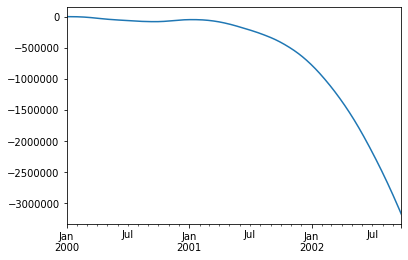

In [58]:
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

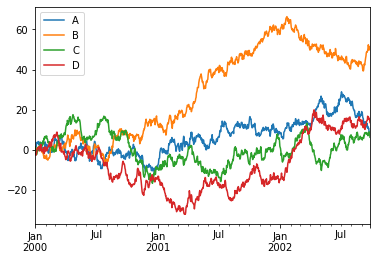

In [65]:
#데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

df = pd.DataFrame(np.random.randn(1000,4), index = ts.index, columns = ['A','B','C','D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc = 'best')

In [68]:
#Getting Data In/Out (데이터 입/출력)

df.to_csv('foo.csv')
df.read_csv('foo.csv')

In [ ]:
#HDF5 Store에 씁니다.

df.to_hdf('foo.h5', 'df')
pd.read_hdf('foo.h5', 'df')

In [ ]:
#MS Excel에 읽고 씁니다.

df.to_excel('foo.xlsx', sheet_name = 'Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col = None, na_values = ['NA'])

In [70]:
#Gotchas(잡았다!)
#연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

if pd.Series([False, True, False]):
    print('I was true')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [71]:
#이러한 경우에는 any(), all(), emplty 등을 사용해서 무엇을 원하는지 선택해주어야 합니다.

if pd.Series([False, True, False]) is not None:
    print('I was not None')

I was not None
